**ids-pdl01-tut.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the *Python Data Lab* of the module *CH-700 Introduction to Data Science* offered in Fall 2024 at Constructor University. Jupyter notebooks and other learning resources are available from a dedicated *module platform*.

# Introduction to the Python Data Lab

The first session of the *Python Data Lab* introduces the computational setup, tools, and infrastructure used in the module _Introduction to Data Science_. Tutorials and exercises are offered through *Jupyter notebooks* such as this one, integrating text, Python code, and graphics in a single document. Using standard web browsers, Jupyter notebooks can be run locally on desktop or laptop computers, or on a Jupyter notebook server such as the JupyterHub provided by Constructor University's *Computational Laboratory for Analysis, Modeling, and Visualization (CLAMV)*.

In this tutorial, the basic functionality of a Jupyter notebook is demonstrated using data from public repositories. Before you start, observe the difference between _markdown cells_ and _code cells_. This text resides in a _markdown cell_. The cell below is an example of a _code cell_ with a Python instruction. To run the code, click on the cell to activate it, and then click on the `Run` button in the menu.

In [10]:
print('Hello World!')

Hello World!


Now navigate through the notebook from top to bottom, execute the code cells sequentially, and observe the output that is generated. There is no need to add any entries to this document.  To refresh the notebook and recover the initial state, choose the `Kernel` menu and select `Restart & Clear Output`.

## Preparation

The following data files are expected to reside in the working directory. Identify the files on the module platform and upload them to the same folder as this Jupyter notebook.

- `co2_mm_mlo.txt`: [Mauna Loa CO$_2$ monthly mean data](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt) hosted by [NOAA's Global Monitoring Laboratory](https://gml.noaa.gov/).
- `PIA01141.tif`: grayscale image of a region on Mars containing the geologic _Face on Mars_ formation, photographed by NASA's Viking 1 Orbiter on July 25, 1976. The file is available from [NASA's JPL Photojournal website](https://photojournal.jpl.nasa.gov/catalog/PIA01141).
- `march2014_1920x1200.jpeg`: [color image](https://www.nasa.gov/sites/default/files/thumbnails/image/march2014_1920x1200.jpeg) (Credit: NASA/USGS Landsat; Geoscience Australia) featured on [this NASA website](https://www.nasa.gov/image-feature/color-explosion-beautiful-earth). The source image was taken in May 2013 by the Landsat 8 satellite over Western Australia, and then enhanced. 
- `life-expectancy-at-birth-total-years.csv`: Life expectancy at birth 1960-2019, published by the [World Bank, 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), available from [Our World in Data](https://ourworldindata.org/grapher/life-expectancy-at-birth-total-years).
- `gdp-per-capita-in-us-dollar-world-bank.csv`: GDP per capita in constant 2010 US dollars 1960-2020, published by the [World Bank, 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), available from [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-in-us-dollar-world-bank).

Run the following code cell to import standard Python data science libraries, and to allow for inline display of graphics. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from PIL import Image
import pandas as pd
%matplotlib inline

## Mauna Loa CO$_2$ time series

The file `co2_mm_mlo.txt` as obtained from [NOAA's Global Monitoring Laboratory](https://gml.noaa.gov/) contains monthly mean atmospheric CO$_2$ concentrations measured at the Mauna Loa observatory. Click on the filename in the directory listing to display the content of this plain text file. Note the contextual information is in a header separated from the data stored in several columns.   

The code in the following cells loads two columns from the Mauna Loa CO$_2$ data file: fractional year and monthly CO$_2$ concentration values. The data are displayed as a line plot. The CO$_2$ measurements constitute a one-dimensional array of numerical values (data vector).

Shape of the data array: (769,)


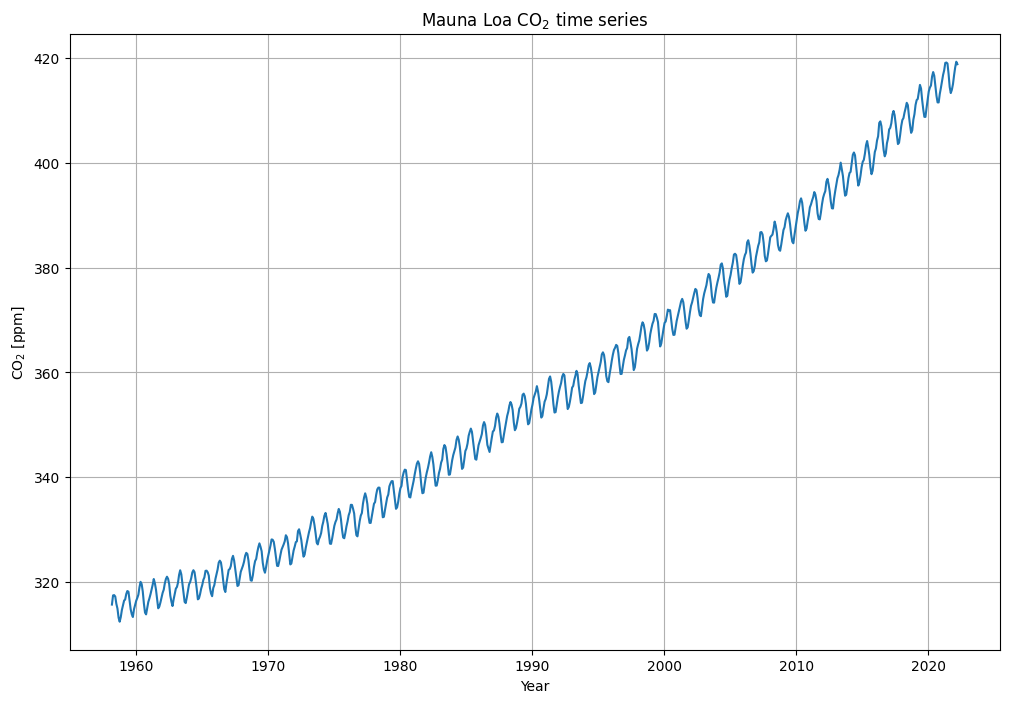

In [15]:
year, data = np.genfromtxt('co2_mm_mlo.txt', usecols=(2, 3), unpack=True)
plt.figure(figsize=(12, 8))
plt.plot(year, data)
plt.title('Mauna Loa CO$_2$ time series')
plt.xlabel('Year')
plt.ylabel('CO$_2$ [ppm]')
plt.grid()
print('Shape of the data array: {}'. format(data.shape))

## Grayscale image of a geologic formation on Mars

The Viking 1 Orbiter image is loaded and displayed. As for 8-bit images, intensities are in the range 0-255. The underlying numerical values form a two-dimensional array of numerical values (data matrix).

Shape of the data array: (472, 640)


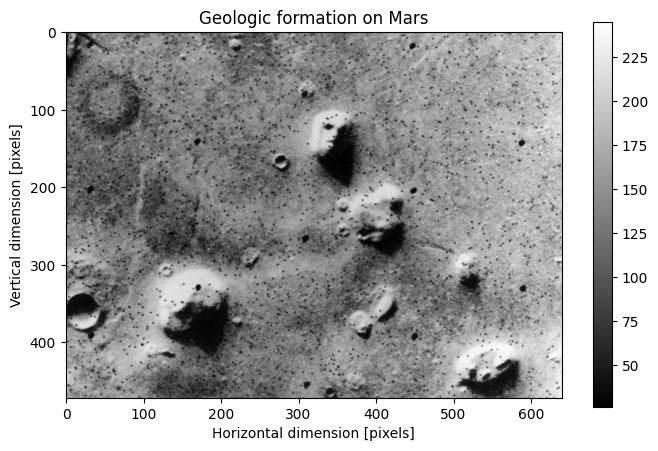

In [4]:
data = np.asarray(Image.open('PIA01141.tif'))
plt.figure(figsize=(8, 5))
plt.imshow(data,cmap='gray')
plt.title('Geologic formation on Mars')
plt.xlabel('Horizontal dimension [pixels]')
plt.ylabel('Vertical dimension [pixels]')
plt.colorbar()
print('Shape of the data array: {}'.format(data.shape))

## Color image taken by Landsat

Color images are stored in several two-dimensional arrays. Each of the arrays (also called channels) represents one color according to a color model, typically RGB (red-green-blue). A four-channel version of the RGB model is RGBA, with the channel A (alpha) quantifying transparency.

The following code loads and displays the Landsat 8 image, and then shows the three color channels as grayscale plots. The figure is saved as a graphics file in your local directory. Check the directory listing when you run the code.

Shape of the data array: (1200, 1920, 3)


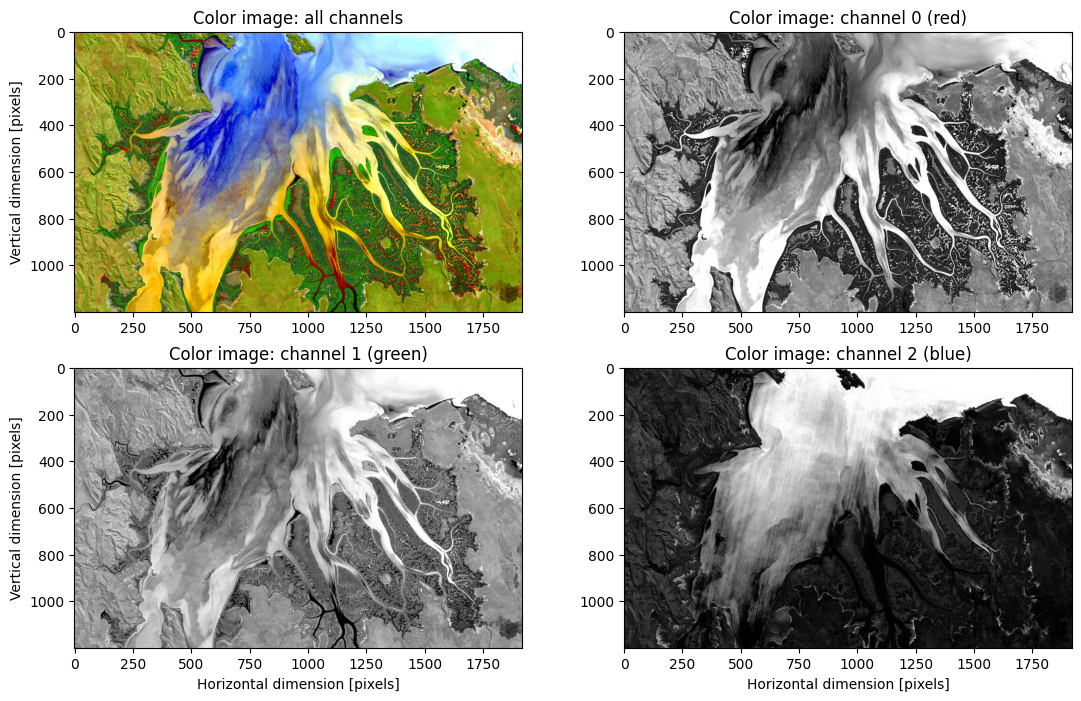

In [5]:
data = np.asarray(Image.open('march2014_1920x1200.jpeg'))
print('Shape of the data array: {}'.format(data.shape))
plt.figure(figsize=(13, 8))
plt.subplot(2, 2, 1)
plt.imshow(data, vmin=0, vmax=255)
colstr = ['(red)', '(green)', '(blue)']
plt.title('Color image: all channels')
plt.ylabel('Vertical dimension [pixels]')
for k in range(3):
    plt.subplot(2, 2, k+2)
    plt.imshow(data[..., k], cmap='gray', vmin=0, vmax=255)
    plt.title('Color image: channel {} '.format(k) + colstr[k])
    if k>0: plt.xlabel('Horizontal dimension [pixels]')
    if 1==k%2: plt.ylabel('Vertical dimension [pixels]')
#---plt.savefig('landsat8_color_channels.png', facecolor=None, bbox_inches='tight')

## Tabular data on life expectancy and GDP

The file `life-expectancy-at-birth-total-years.csv` provides data on the life expectancy at birth in the period 1960-2019 as published by the [World Bank on 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), and made available through [Our World in Data](https://ourworldindata.org/grapher/life-expectancy-at-birth-total-years). Click on the filename in the directory listing to display the content of this text file. Data columns are separated by commas. The first line names the variables that are listed. Single countries come with a three-letter abbreviation (`Code`) which is not provided for groups of countries.

The life expectancy data file is conveniently imported and displayed using the Pandas package.

In [6]:
df1 = pd.read_csv('life-expectancy-at-birth-total-years.csv')
display(df1)

Entity Code  Year  Life expectancy at birth, total (years)
0      Afghanistan  AFG  1960                                   32.446
1      Afghanistan  AFG  1961                                   32.962
2      Afghanistan  AFG  1962                                   33.471
3      Afghanistan  AFG  1963                                   33.971
4      Afghanistan  AFG  1964                                   34.463
...            ...  ...   ...                                      ...
14605     Zimbabwe  ZWE  2015                                   59.534
14606     Zimbabwe  ZWE  2016                                   60.294
14607     Zimbabwe  ZWE  2017                                   60.812
14608     Zimbabwe  ZWE  2018                                   61.195
14609     Zimbabwe  ZWE  2019                                   61.490

[14610 rows x 4 columns]

We proceed in the same way with the file `gdp-per-capita-in-us-dollar-world-bank.csv` containing data on GDP per capita in constant 2010 US dollars 1960-2020, also published by the [World Bank on 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), and made available through [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-in-us-dollar-world-bank). Click on the filename in the directory listing to display the content of this comma-separated text file to study the structure.

The GDP per capita data are imported and displayed using Pandas.

In [7]:
df2 = pd.read_csv('gdp-per-capita-in-us-dollar-world-bank.csv')
display(df2)

Entity Code  Year  GDP per capita (constant 2010 US$)
0      Afghanistan  AFG  2002                          330.303494
1      Afghanistan  AFG  2003                          343.080890
2      Afghanistan  AFG  2004                          333.216617
3      Afghanistan  AFG  2005                          357.234762
4      Afghanistan  AFG  2006                          365.284371
...            ...  ...   ...                                 ...
12147     Zimbabwe  ZWE  2016                         1224.314460
12148     Zimbabwe  ZWE  2017                         1263.278346
12149     Zimbabwe  ZWE  2018                         1289.146499
12150     Zimbabwe  ZWE  2019                         1168.008072
12151     Zimbabwe  ZWE  2020                         1058.845827

[12152 rows x 4 columns]

The data sets are merged, keeping only those rows with valid data for both life expectancy and GDP per capita, and eliminating groups of countries from the list. Inconveniently long column labels are abbreviated.

In [8]:
df3 = pd.merge(df1, df2)
df3.dropna(inplace=True)
df3 = df3[df3['Entity']!='World']
df3.rename(columns={df3.columns[3]:'Life exp.', df3.columns[4]:'GDP/cap.'},
           inplace=True, errors='raise')
display(df3)

Entity Code  Year  Life exp.     GDP/cap.
0      Afghanistan  AFG  2002     56.784   330.303494
1      Afghanistan  AFG  2003     57.271   343.080890
2      Afghanistan  AFG  2004     57.772   333.216617
3      Afghanistan  AFG  2005     58.290   357.234762
4      Afghanistan  AFG  2006     58.826   365.284371
...            ...  ...   ...        ...          ...
11474     Zimbabwe  ZWE  2015     59.534  1234.102191
11475     Zimbabwe  ZWE  2016     60.294  1224.314460
11476     Zimbabwe  ZWE  2017     60.812  1263.278346
11477     Zimbabwe  ZWE  2018     61.195  1289.146499
11478     Zimbabwe  ZWE  2019     61.490  1168.008072

[8899 rows x 5 columns]

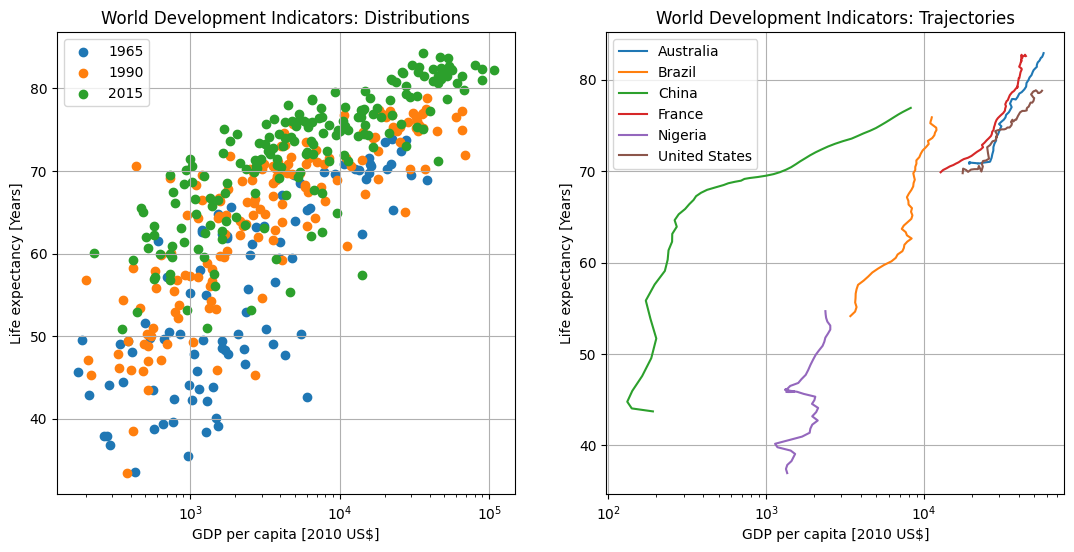

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
Years = [1965, 1990, 2015]
for year in Years:
    df4 = df3[df3['Year']==year]
    plt.scatter(df4['GDP/cap.'], df4['Life exp.'], label='{}'.format(year))
plt.legend()
plt.grid()
plt.title('World Development Indicators: Distributions')
plt.xlabel('GDP per capita [2010 US$]')
plt.ylabel('Life expectancy [Years]')
plt.xscale('log')
plt.subplot(1, 2, 2)
Countries = ['Australia', 'Brazil', 'China', 'France', 'Nigeria', 'United States']
for country in Countries:
    df4 = df3[df3['Entity']==country]
    plt.plot(df4['GDP/cap.'], df4['Life exp.'], label=country)
plt.legend()
plt.grid()
plt.title('World Development Indicators: Trajectories')
plt.xlabel('GDP per capita [2010 US$]')
plt.ylabel('Life expectancy [Years]')
plt.xscale('log')
#---plt.savefig('income_lifespan.png', facecolor=None, bbox_inches='tight')

See the [Gapminder World Health Chart](https://www.gapminder.org/fw/world-health-chart) for further information on the evolution of Global Health.

---
---